# Understanding Profitable App Profiles on Apple and Google Markets

In this project, we are interested in the characteristics of apps that attract the most users. High user count is most important for apps whose revenue is based on in-app ads. Our goal is to increase revenue by emulating the most attractive iOS and Andriod apps in theGoogle Play and the Apple Store.

A data set containing data about approximately ten thousand Android apps from Google Play. You can download the data set directly from this link.
A data set containing data about approximately seven thousand iOS apps from the App Store. You can download the data set directly from this link.

In [2]:
# import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_theme()
import matplotlib.style as style
import re

In [3]:
# open the Apple Store dataset
opened_file = pd.read_csv('AppleStore.csv')
ios_df = pd.DataFrame(data=opened_file)
ios_header = ios_df.columns
ios_1 = ios_df.iloc[1:]

# open Google Play dataset
opened_file = pd.read_csv('googleplaystore.csv')
google_df = pd.DataFrame(data=opened_file)
google_header = google_df.columns
google_1 = google_df.iloc[1:]

# create copies of the dataset
ios = ios_1.copy()
google = google_1.copy()

# Data Exploration_Google

Now we will run the same analysis for the Google Dataset. After running the code below, this is what we learned:
- There are 13 columns with a mix of data types: float(1), object(12)
- There are 9 features:"Category", "Rating", "Reviews", "Size", "Installs", "Type", "Price", "Content Rating", "Genres"
- There are over 1,000 null values under "Rating"
- There are over 10,000 records in this dataset with an average user rating of 4.19 stars. 
- Because most of our features contain alphanumeric values, we will have to clean them prior to any additional analysis.

Again, I will disable the code for readability. Please feel free to run the code below for your own reference!

In [23]:
# google.info()
# print(google.head())
# google_features = ["Category", "Rating", "Reviews", "Size", "Installs", "Type", "Price", "Content Rating", "Genres"] 
# google.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 1 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10837 non-null  object 
 13  Size_Clean      10840 non-null  object 
 14  Installs_Clean  10840 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.2+ MB
                                                 App        Category  Rat

,Rating
count,9366.000000
mean,4.193348
std,0.537459
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Data Exploration_Apple

First, we want to understand the features, dtypes, null values, and statistical spread of the Apple Store and Google Play datasets.

From this initial analysis of the Apple dataset, we know that:
- There are 17 columns with a mix of data types: float(3), int64(8), object(6)
- There are 10 features:"size_bytes", "price", "rating_count_tot", "rating_count_ver", "user_rating", "user_rating_ver", "sup_devices.num", "ipadSc_urls.num", "lang.num", "vpp_lic"
- There are over 7000 records in this dataset with an average user rating of 3.52 stars.

I will disable the code for readability. Please feel free to run the code below for your own reference!

In [20]:
# ios.info() 
# print(ios.head())
# ios_features = ["size_bytes", "price", "rating_count_tot", "rating_count_ver", "user_rating", "user_rating_ver", "sup_devices.num", "ipadSc_urls.num", "lang.num", "vpp_lic"]
# ios.describe()

# Data Cleaning_Google 

In exploring the Google dataset, we noted several features contained alphanumeric values and would need to be cleaned. Below are the steps we will take to clean the dataset:

- Remove 'M' from Size column
- Remove '+' from Installs column
- Convert Rating, Reviews, Size, Installs, Price to the float data type
    
Please see the function created below.

In [25]:
replace_characters = ["M", "k", "+", ","] # where did I get some of these characters

def clean(dataset, column):
    dataset_clean = dataset.copy()
    dataset_clean[column +"_Clean"] = dataset_clean[column].copy()
    i = 0
    k = len(replace_characters)
    while i < k:         
        dataset_clean[column +"_Clean"] = dataset_clean[column +"_Clean"].str.strip().str.replace(replace_characters[i], "") 
        i += 1
    return dataset_clean[column +"_Clean"].astype(float)

In [ ]:
clean(google, "Size")
clean(google, "Installs") 

# clean ios dataset # remove "+"from cont_rating

clean(ios, "cont_rating")

# print('Unique Values in pd series:', google["Installs"].value_counts()) # used this line to understand what non-numerical data was in the column.

In [8]:
# Detect inaccurate data, and correct or remove it. # note: remove row 10472  
google_clean = google.drop(10472, axis=0) 

# no dropping necessary for ios dataset

In [9]:
# Remove apps that aren't free.
google_bool = google_clean["Type"] == "Free"
google_clean2 = google_clean.drop(google_clean.index[(google_bool)],  axis=0)
print(google_clean2["Type"].value_counts())

ios_bool = ios["price"] == 0
ios_clean2 = ios.drop(ios.index[(ios_bool)],  axis=0)
print(ios_clean2["price"].value_counts())


Paid    800
Name: Type, dtype: int64
0.99      728
2.99      683
1.99      621
4.99      394
3.99      277
6.99      166
9.99       81
5.99       52
7.99       33
14.99      21
19.99      13
8.99        9
24.99       8
13.99       6
29.99       6
11.99       6
12.99       5
15.99       4
17.99       3
59.99       3
39.99       2
22.99       2
16.99       2
20.99       2
49.99       2
27.99       2
23.99       2
74.99       1
99.99       1
299.99      1
18.99       1
21.99       1
34.99       1
249.99      1
47.99       1
Name: price, dtype: int64


In [10]:
# Detect duplicate data, and remove the duplicates. # note: check each feature for duplicates
google_clean3 = google_clean2.drop_duplicates()
print(google_clean3.head())

print('\n')
print('\n')
print('\n')

ios_clean3 = ios_clean2.drop_duplicates()
print(ios_clean3.head())

                                               App       Category  Rating  \
234  TurboScan: scan documents and receipts in PDF       BUSINESS     4.7   
235                 Tiny Scanner Pro: PDF Doc Scan       BUSINESS     4.8   
427                             Puffin Browser Pro  COMMUNICATION     4.0   
476                      Moco+ - Chat, Meet People         DATING     4.2   
477                                     Calculator         DATING     2.6   

    Reviews                Size  Installs  Type  Price Content Rating  \
234   11442                6.8M  100,000+  Paid  $4.99       Everyone   
235   10295                 39M  100,000+  Paid  $4.99       Everyone   
427   18247  Varies with device  100,000+  Paid  $3.99       Everyone   
476    1545  Varies with device   10,000+  Paid  $3.99     Mature 17+   
477      57                6.2M    1,000+  Paid  $6.99       Everyone   

            Genres      Last Updated  Current Ver Android Ver Size_Clean  \
234       Business    

In [11]:
# Remove non-English apps like 爱奇艺PPS -《欢乐颂2》电视剧热播.
def is_english(string):
    non_ascii = 0
    
    for character in string:
        if ord(character) > 127:
            non_ascii += 1
    
    if non_ascii > 3:
        return False
    else:
        return True
     
google_cleanbool = google_clean3["App"].apply(is_english)
google_clean4 = google_clean3[google_cleanbool]
print(google_clean4["App"].value_counts()) # 753 english titles ; 4 non-english titles = 757


ios_cleanbool = ios_clean3["track_name"].apply(is_english)
ios_clean4 = ios_clean3[ios_cleanbool]
print(ios_clean4["track_name"].value_counts()) 

Camera FV-5                                         2
HD Widgets                                          2
Human Anatomy Atlas 2018: Complete 3D Human Body    2
Dr. Panda & Toto's Treehouse                        2
Minecraft                                           2
                                                   ..
Santa's Monster Shootout DX                         1
Deus Ex GO                                          1
FVD Ad-Free                                         1
End Anxiety Pro - Stress, Panic Attack Help         1
DK Primrose for KLWP                                1
Name: App, Length: 753, dtype: int64
Delicious - Emily's Tea Garden                                                                   1
Mystery Tales: The Twilight World - A Hidden Object Adventure (Full)                             1
Cytus                                                                                            1
Sunny ~ Calm wave & ocean sounds to Sleep Relax Meditate on the beach wi

## Let's begin the analysis by getting a sense of the most common genres for each market. For this, we'll build a frequency table # for the prime_genre column of the App Store data set, and the Genres and Category columns of the Google Play data set. 

In [12]:
print("App Store top genres:", '\n', ios_clean4["prime_genre"].value_counts().head()) 
print('\n')
print('\n')
print("Google Store top genres:", '\n', google_clean4["Genres"].value_counts().head()) 
print('\n')
print('\n')
print("Google store top categories:", '\n', google_clean4["Category"].value_counts().head())

App Store top genres: 
 Games            1518
Education         292
Entertainment     195
Photo & Video     181
Utilities         132
Name: prime_genre, dtype: int64




Google Store top genres: 
 Medical            84
Personalization    82
Tools              78
Education          29
Productivity       28
Name: Genres, dtype: int64




Google store top categories: 
 FAMILY             186
MEDICAL             84
GAME                83
PERSONALIZATION     82
TOOLS               78
Name: Category, dtype: int64


# Most Popular Apps by Genre on the App Store

## One way to find out what genres are the most popular (have the most users) is to calculate the average number of installs for each app genre. For the Google Play data set, we can find this information in the Installs column, but for the App Store data set this information is missing. As a workaround, we'll take the total number of user ratings as a proxy, which we can find in the rating_count_tot app. 

Google installs per genre:


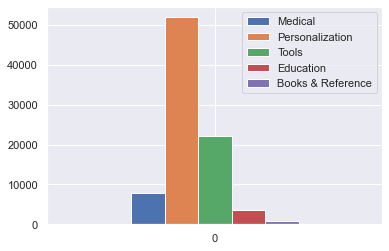

In [13]:
ios_topgenre = ["Games", "Education", "Entertainment", "Photo & Video", "Utilities"]
google_topgenre = ["Medical", "Personalization", "Tools","Education", "Books & Reference"]
google_topcategories = ["FAMILY", "MEDICAL", "GAME", "PERSONALIZATION", "TOOLS"]

ios_installs = {}
google_installs_genre = {}
google_installs_category = {}

def install_count(topgenre_list, dictionary, dataset, column_name, installs_name):
    for i in topgenre_list:
        install_bool = dataset[column_name] == i
        dk = dataset[install_bool]
        install_avg = dk[installs_name].astype(float).mean()
        dictionary[str(i)] = install_avg 
    return dictionary


d_google = install_count(google_topgenre, google_installs_genre, google_clean4, "Genres", "Installs_Clean")
df = pd.DataFrame([d_google], columns=d_google.keys())

# print(df)
print('Google installs per genre:')
df.plot.bar(rot=0)

Google installs per category:


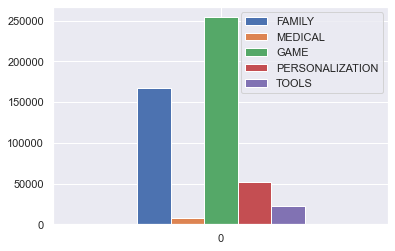

In [14]:
d_google_c = install_count(google_topcategories, google_installs_category, google_clean4, "Category", "Installs_Clean")
df_gc = pd.DataFrame([d_google_c], columns=d_google_c.keys())

# print(df_gc)
print('Google installs per category:')
df_gc.plot.bar(rot=0)

Ios rating count total per genre:


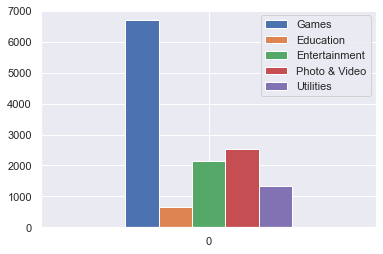

In [15]:
d_ios = install_count(ios_topgenre, ios_installs, ios_clean4, "prime_genre", "rating_count_tot")
df_ios = pd.DataFrame([d_ios], columns=d_ios.keys())

# print(df_ios)
print('Ios rating count total per genre:')
df_ios.plot.bar(rot=0)

# Observations / Conclusion

## Not suprisingly, apps that are categorized under "Games" do the best in Google and App stores. I'm not sure what genre "Personalization" fits under, but it could be a genre worth exploring under the App Store.

# Next Time 

## If I were to do this again, I would clean the Installs column for the Apps column and try to do an Installs Count comparison between the google and ios datasets.